# total population and hk recycling rate

Model Summary:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3644      0.296      7.990      0.000       1.743       2.986
HK_pop     -2.752e-07   4.11e-08     -6.695      0.000   -3.62e-07   -1.89e-07

R-squared: 0.7135


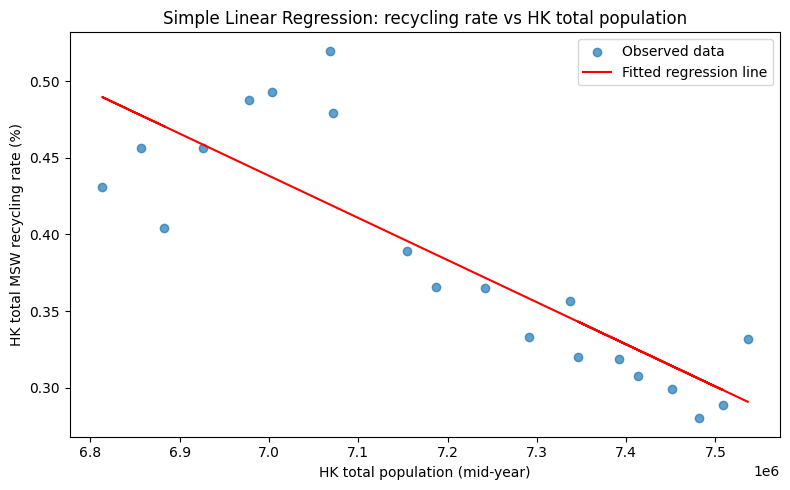

In [1]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset (HK MSW Volume and Recycling Rat sheet is the default first sheet)
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

# ---------- Simple Linear Regression: recycling_rate vs population ----------

# Column names (follow the cleaned-data headers exactly)
col_pop  = "HK total population (mid-year)"
col_rate = "HK total MSW recycling rate"

# Prepare data
# Convert population like "7,241,700" → 7241700
pop_series = pd.to_numeric(
    df[col_pop].astype(str).str.replace(",", ""),
    errors="coerce"
)

# Convert rate like "40%" → 40.0
rate_series = pd.to_numeric(
    df[col_rate].astype(str).str.rstrip("%"),
    errors="coerce"
)

# Keep rows where both variables are present
mask = pop_series.notna() & rate_series.notna()
X_pop = pop_series.loc[mask].to_frame(name="HK_pop")    # shape (n, 1)
y_rate = rate_series.loc[mask]                          # shape (n,)

# Fit model using sklearn for predictions
lin_reg_pop = LinearRegression()
lin_reg_pop.fit(X_pop, y_rate)

# Fit model using statsmodels for statistical tests
X_pop_sm = sm.add_constant(X_pop)  # Add constant term for intercept
model_pop = sm.OLS(y_rate, X_pop_sm)
results_pop = model_pop.fit()

# Predictions for plotting
y_pred_pop = lin_reg_pop.predict(X_pop)

print("Model Summary:")
print(results_pop.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results_pop.rsquared:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_pop, y_rate, alpha=0.7, label="Observed data")
plt.plot(X_pop, y_pred_pop, color="red", label="Fitted regression line")
plt.xlabel("HK total population (mid-year)")
plt.ylabel("HK total MSW recycling rate (%)")
plt.title("Simple Linear Regression: recycling rate vs HK total population")
plt.legend()
plt.tight_layout()
plt.show()


**Population coefficient ($\hat \beta_1$) = -0.000027 (p = 0.003 < 0.05)**  

- There is a **statistically significant negative association** between Hong Kong’s total population and the overall MSW recycling rate: years with a larger population tend to have a lower territory-wide recycling percentage.  

- Population alone explains a **moderate share of the variation in recycling rate** (about **44% of the variance**, based on R-squared approx 0.44), suggesting that other policy, economic, and behavioural factors also play an important role in determining recycling performance.
